# 6.4 Supervised Machine Learning: Regression

## Imports

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\malac\Downloads\Realtor.com cf'

In [5]:
path

'C:\\Users\\malac\\Downloads\\Realtor.com cf'

In [9]:
# Import recipe dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'real_estate.csv'))

# Data Cleaning

In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
df.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [12]:
df.shape

(414, 8)

In [13]:
# Rename columns like before

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

In [14]:
# Check for missing values

df.isnull().sum()

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

In [15]:
# Check for dups

dups = df.duplicated()

In [16]:
dups.shape

(414,)

No dups

## Check for extreme values

C:\Users\malac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price per unit', ylabel='Density'>

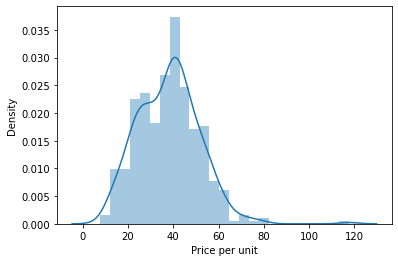

In [19]:
# Check price for extremes

sns.distplot(df['Price per unit'], bins = 25)

Some of the higher values may need to be removed but we will try without first

In [20]:
# Check mean

df['Price per unit'].mean()

37.98019323671498

In [21]:
# Check mediam

df['Price per unit'].median()

38.45

In [22]:
# Check max

df['Price per unit'].max()

117.5

# Data prep for regression analysis

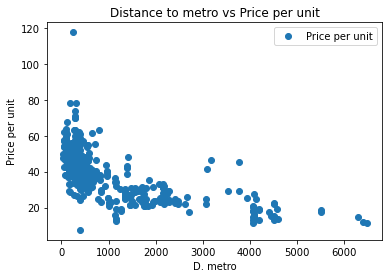

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'D. metro', y='Price per unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['D. metro'].values.reshape(-1,1)
y = df['Price per unit'].values.reshape(-1,1)

In [30]:
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [31]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [36]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit regression to train set

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

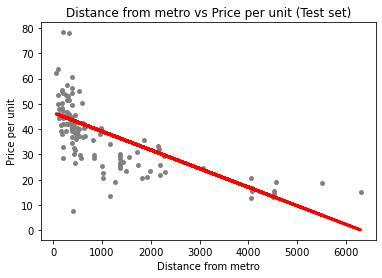

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00733387]]
Mean squared error:  94.83699358134518
R2 score:  0.44352398177065955


In [44]:
y_predicted

array([[44.89433915],
       [13.23961319],
       [44.0619849 ],
       [13.29826212],
       [45.1984526 ],
       [42.86012992],
       [45.19294633],
       [43.47328443],
       [44.39765084],
       [43.58068891],
       [44.60697113],
       [43.98049611],
       [45.07009527],
       [45.28920993],
       [44.54074851],
       [41.92446716],
       [42.82465087],
       [45.08514949],
       [42.83510677],
       [45.0513433 ],
       [45.78167276],
       [36.46998752],
       [39.01335777],
       [44.32319596],
       [43.13570362],
       [43.6341374 ],
       [43.13278401],
       [33.71644332],
       [43.58068891],
       [23.85756318],
       [44.15032573],
       [40.30131455],
       [44.43548039],
       [42.19722906],
       [43.13278401],
       [36.46998752],
       [45.55234173],
       [35.00550237],
       [43.66144138],
       [ 0.19658087],
       [43.95912009],
       [42.39356547],
       [35.46103816],
       [45.63873981],
       [16.50811216],
       [43

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.3,44.894339
1,14.4,13.239613
2,46.0,44.061985
3,15.6,13.298262
4,50.2,45.198453
5,38.1,42.860130
6,48.5,45.192946
7,41.4,43.473284
8,51.6,44.397651
9,40.1,43.580689
